In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#from google.colab import files
#uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [130]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pre_Processing/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pre_Processing//test.csv')

In [131]:
len(train)

891

In [132]:
len(test)

418

In [26]:
#train = pd.read_csv('/content/train.csv')
#test = pd.read_csv('/content/test.csv')

In [37]:
train.shape

(891, 12)

In [115]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [38]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [39]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

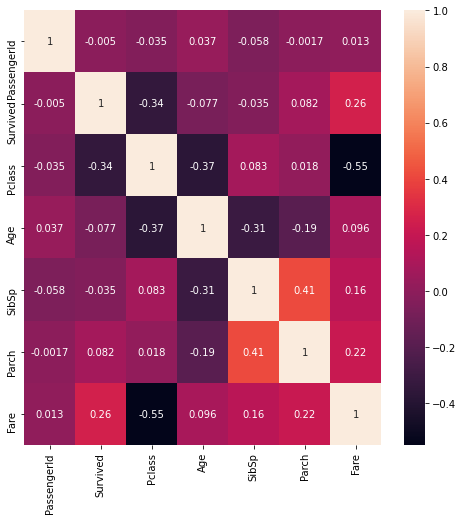

In [47]:
train_df_corr = train.corr()
fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(train_df_corr,annot=True);

In [50]:
corr = train.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

Fare         Fare           1.000000
Parch        Parch          1.000000
Survived     Survived       1.000000
Pclass       Pclass         1.000000
SibSp        SibSp          1.000000
Age          Age            1.000000
PassengerId  PassengerId    1.000000
Pclass       Fare           0.549500
Fare         Pclass         0.549500
Parch        SibSp          0.414838
SibSp        Parch          0.414838
Pclass       Age            0.369226
Age          Pclass         0.369226
Pclass       Survived       0.338481
Survived     Pclass         0.338481
SibSp        Age            0.308247
Age          SibSp          0.308247
Survived     Fare           0.257307
Fare         Survived       0.257307
Parch        Fare           0.216225
Fare         Parch          0.216225
Age          Parch          0.189119
Parch        Age            0.189119
Fare         SibSp          0.159651
SibSp        Fare           0.159651
Fare         Age            0.096067
Age          Fare           0.096067
P

In [51]:
train.corr().unstack().sort_values().drop_duplicates()

Pclass       Fare          -0.549500
             Age           -0.369226
             Survived      -0.338481
SibSp        Age           -0.308247
Age          Parch         -0.189119
             Survived      -0.077221
SibSp        PassengerId   -0.057527
             Survived      -0.035322
Pclass       PassengerId   -0.035144
Survived     PassengerId   -0.005007
Parch        PassengerId   -0.001652
PassengerId  Fare           0.012658
Parch        Pclass         0.018443
Age          PassengerId    0.036847
Survived     Parch          0.081629
Pclass       SibSp          0.083081
Age          Fare           0.096067
SibSp        Fare           0.159651
Parch        Fare           0.216225
Survived     Fare           0.257307
SibSp        Parch          0.414838
PassengerId  PassengerId    1.000000
dtype: float64

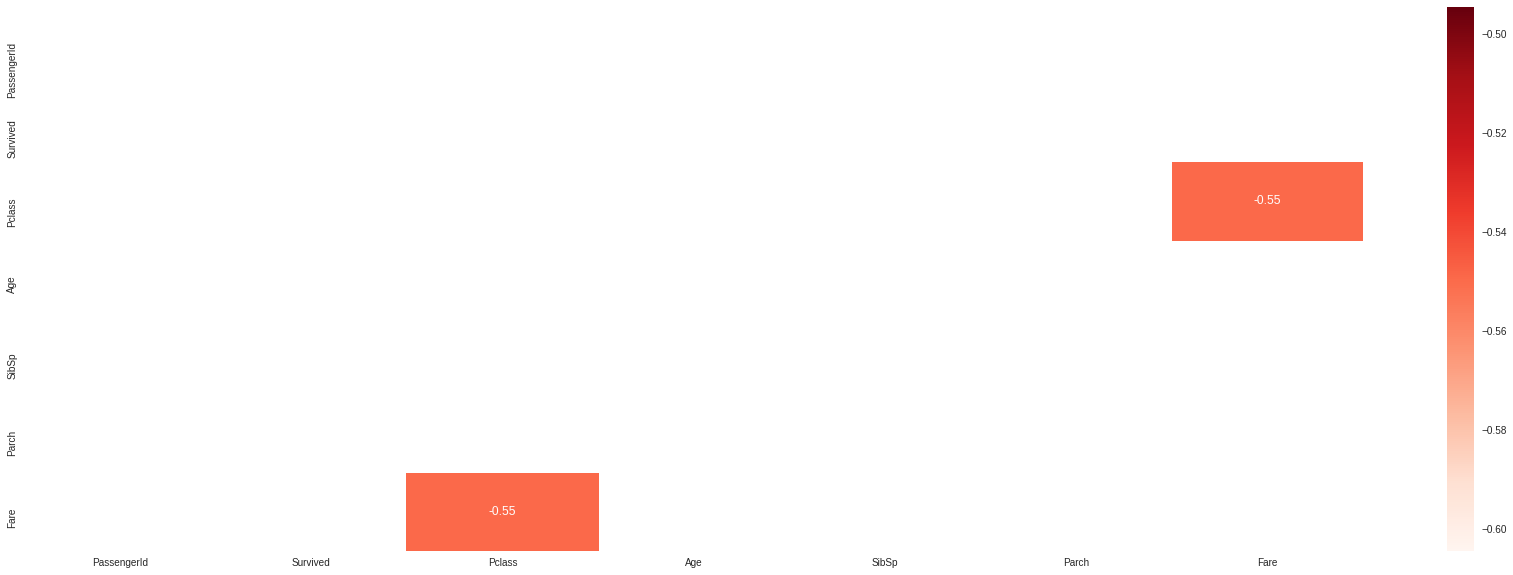

In [53]:
dfCorr = train.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

([<matplotlib.axis.XTick at 0x7fd2f37e1fd0>,
 <a list of 3 Text xticklabel objects>)

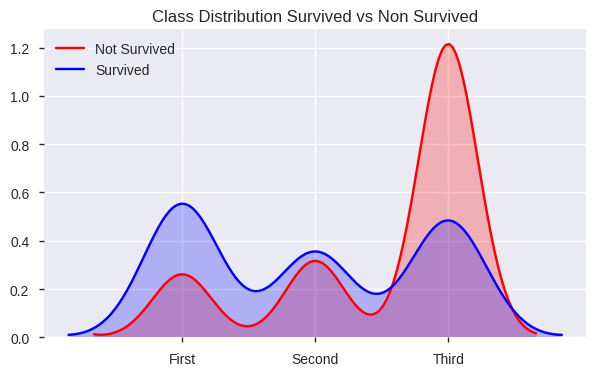

In [ ]:
plt.subplots(figsize=(7,4))
sns.kdeplot(train.loc[(train['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )
plt.title('Class Distribution Survived vs Non Survived',fontsize=12)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()),labels)

Text(0.5,0,'Fare')

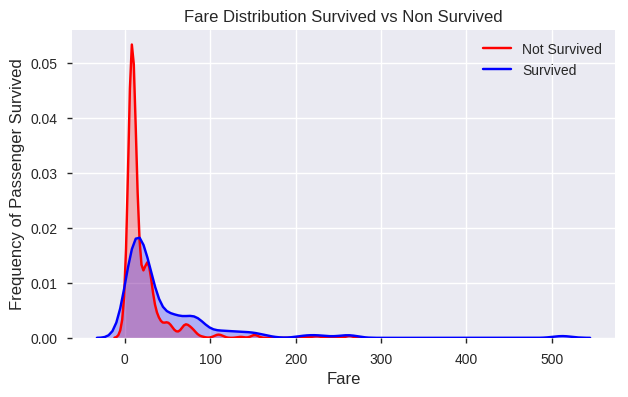

In [ ]:
plt.subplots(figsize=(7,4))
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )

plt.title('Fare Distribution Survived vs Non Survived',fontsize=12)
plt.ylabel('Frequency of Passenger Survived',fontsize=12)

plt.xlabel('Fare',fontsize=12)

# Outliers

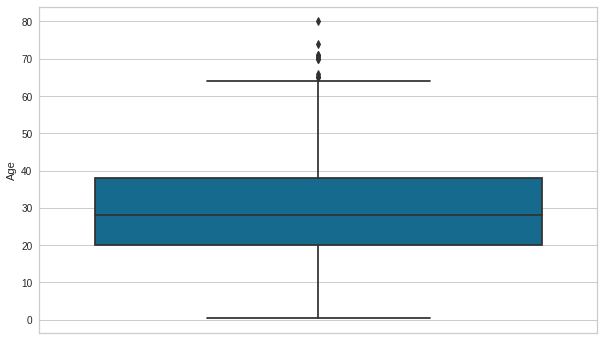

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(y=train["Age"]);
plt.show()

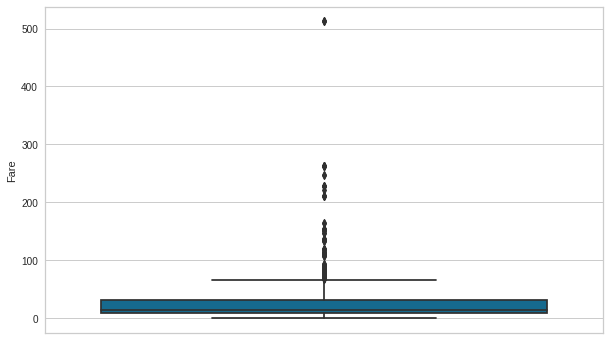

In [67]:
plt.figure(figsize=(10,6))
sns.boxplot(y=train["Fare"]);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


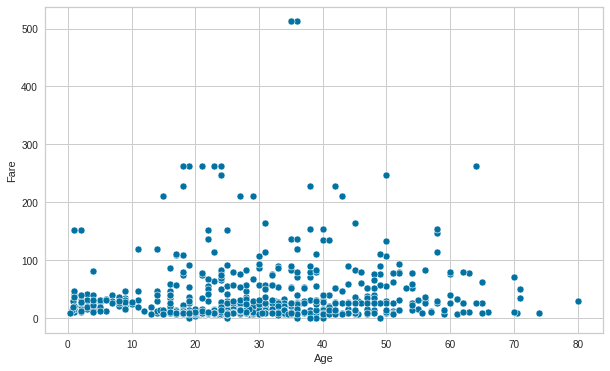

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(train['Age'],train['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


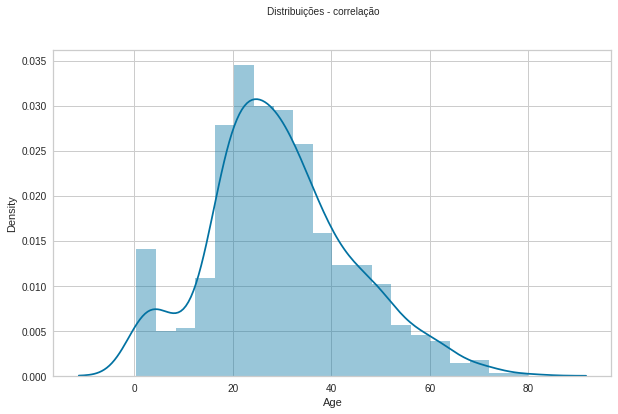

In [69]:
plt.rcParams['figure.figsize'] = (10, 6)

plt.subplot(1, 1, 1)
sns.distplot(train['Age'])

#plt.subplot(1, 4, 2)
#sns.distplot(data_o['loudness'])

#plt.subplot(1, 4, 3)
#sns.distplot(data_o['year'])

#plt.subplot(1, 4, 4)
#sns.distplot(data_o['danceability'])

plt.suptitle('Distribuições - correlação', fontsize = 10)
plt.show()

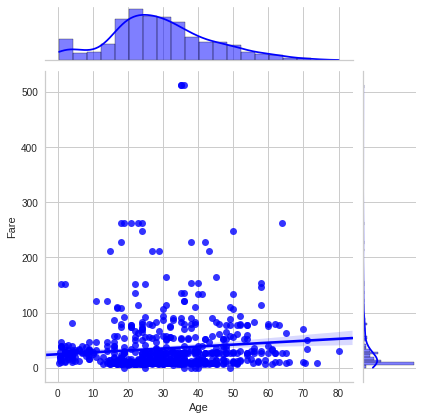

In [71]:
fig1 = sns.jointplot(x="Age", y="Fare", data=train,
                  kind="reg", truncate=False,
                  color='blue')

In [73]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [117]:
def df_drop(x):
  d = x.drop(['Name','Ticket','Cabin'], axis=1)
  return d

In [119]:
df = df_drop(train)

In [123]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [124]:
# Scale numeric values
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# One-hot encode categorical values
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [126]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, selector(dtype_include='float64')),
        ('cat', cat_transformer, selector(dtype_include='object'))])

In [127]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))
])

In [128]:
parameters = {'tree__max_depth': [3, 4, 5]}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(model, param_grid=parameters, cv=kfold, n_jobs=-1, return_train_score=True)
grid.fit(X=df.drop(['Survived'], axis=1), y=df['Survived'])

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                           

In [129]:
df2 = df_drop(test)

In [133]:
predT = grid.predict(df2)

In [135]:
acc_log = round(grid.score(X=df.drop(['Survived'], axis=1), y=df['Survived']) * 100, 2)

In [136]:
acc_log

81.03